In [9]:
from __future__ import print_function
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import pandas_datareader as data 
from pykalman import KalmanFilter

In [112]:
def calc_slope_intercept_kalman(crypto, prices): 
    """
    Utilise the Kalman Filter from the PyKalman package
    to calculate the slope and intercept of the regressed
    ETF prices.
    """
    delta = 1e-5
    trans_cov = delta / (1 - delta) * np.eye(2)
    obs_mat = np.vstack([prices[crypto[0]], np.ones(prices[crypto[0]].shape)] ).T[:, np.newaxis]
    
    kf = KalmanFilter(n_dim_obs=1,n_dim_state=2,initial_state_mean=np.zeros(2),
                      initial_state_covariance=np.ones((2, 2)),transition_matrices=np.eye(2),
                      observation_matrices=obs_mat,observation_covariance=1.0,transition_covariance=trans_cov)

    state_means, state_covs = kf.filter(prices[crypto[1]].values)
    return state_means, state_covs

In [116]:
def draw_slope_intercept_changes(prices, state_means): 
    """
    Plot the slope and intercept changes from the Kalman Filter calculated values.
    """
    pd.DataFrame(dict(slope=state_means[:, 0],
                intercept=state_means[:, 1]), index=prices.index).plot(subplots=True, figsize=(20,15))
    
    plt.show()

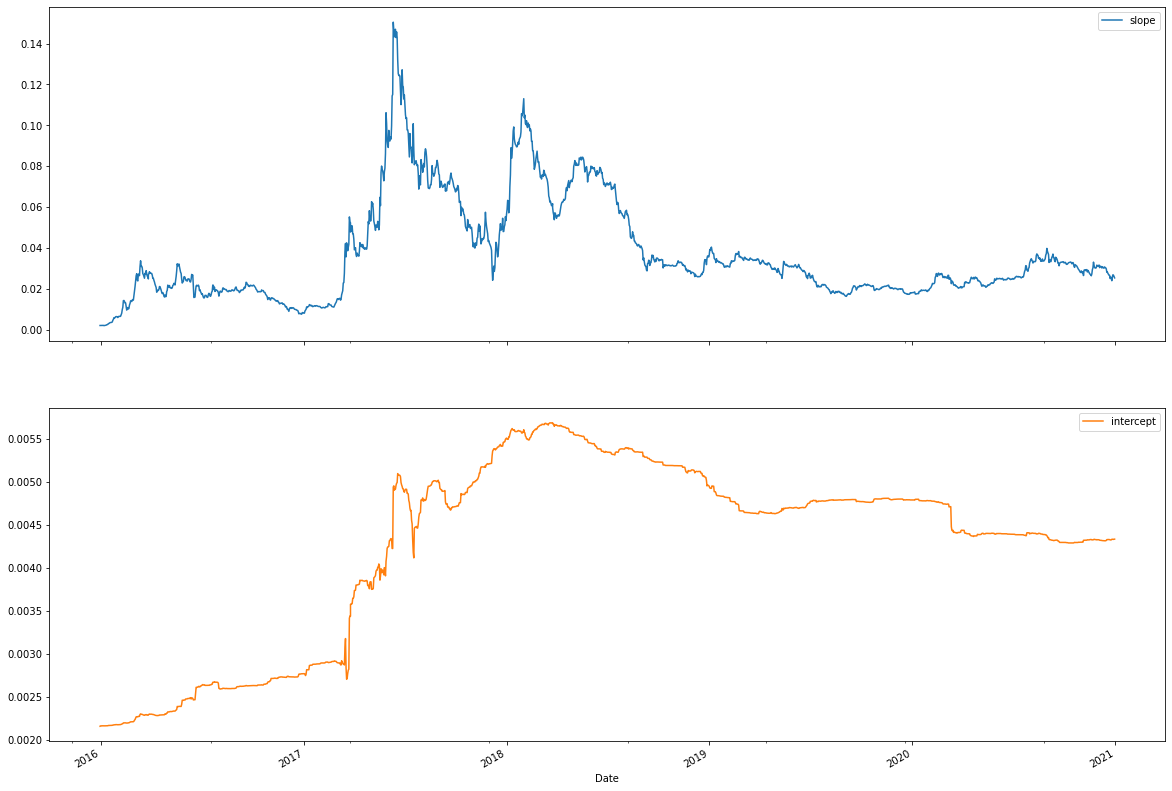

In [117]:
if __name__ == "__main__":
    # Choose the ETF symbols to work with along with # start and end dates for the price histories etfs = [’TLT’, ’IEI’]
    start_date = "2016-01-01"
    end_date = "2020-12-31"
    # Obtain the adjusted closing prices from Yahoo finance
    ethereum_df = data.get_data_yahoo('ETH-USD', start_date, end_date) 
    bitcoin_df  = data.get_data_yahoo('BTC-USD', start_date, end_date)
    prices = pd.DataFrame(index=ethereum_df.index)
    prices['ETH-USD'] = ethereum_df["Adj Close"]
    prices['BTC-USD'] = bitcoin_df["Adj Close"]
    crypto = ['BTC-USD', 'ETH-USD']
    #draw_date_coloured_scatterplot(crypto, prices)
    state_means, state_covs = calc_slope_intercept_kalman(crypto, prices) 
    draw_slope_intercept_changes(prices, state_means)